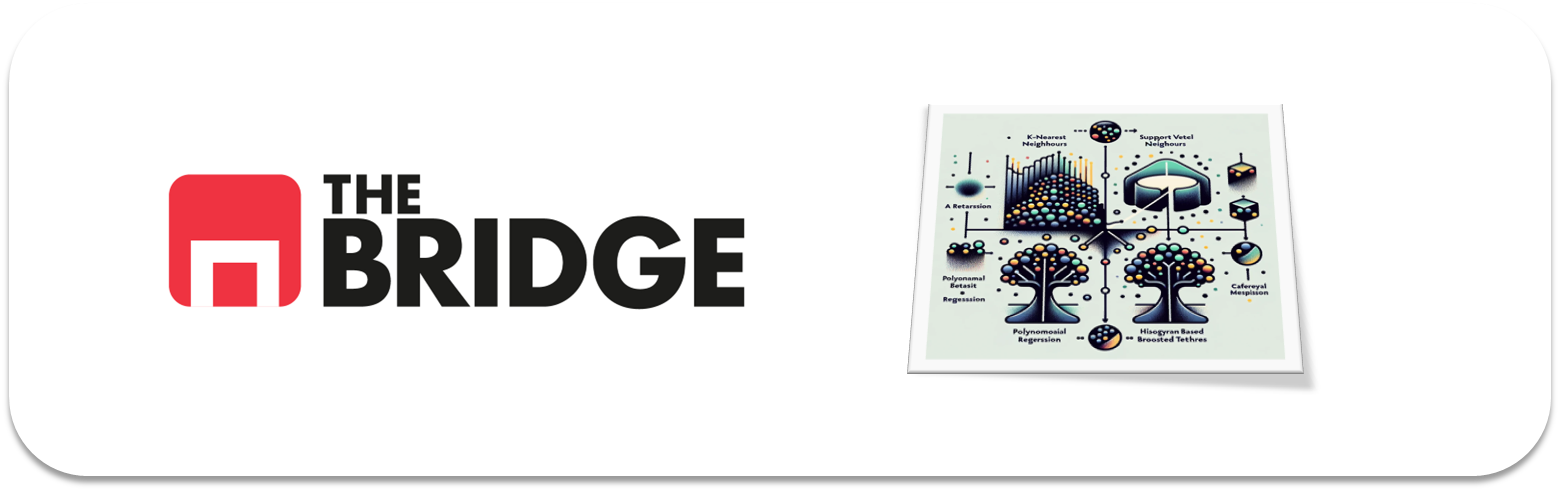

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import bootcampviztools as bt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, mean_absolute_error,mean_squared_error, mean_absolute_percentage_error

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [2]:
df = pd.read_csv("./data/credit_npo.csv")
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,12537.0,0.068916,0.253321,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,12537.0,0.330359,0.368148,0.0,0.030651,0.163490,0.582219,6.0
age,12537.0,52.079445,15.077498,21.0,41.000000,51.000000,62.000000,101.0
NumberOfTime30-59DaysPastDueNotWorse,12537.0,0.409588,4.055787,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,12537.0,1.902253,9.122216,0.0,0.142268,0.302025,0.506725,99.0
MonthlyIncome,12537.0,6864.815420,11509.914511,0.0,3550.000000,5700.000000,8033.000000,702500.0
NumberOfOpenCreditLinesAndLoans,12537.0,8.482332,5.165422,0.0,5.000000,8.000000,11.000000,49.0
NumberOfTimes90DaysLate,12537.0,0.259312,4.035658,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,12537.0,0.999202,1.134325,0.0,0.000000,1.000000,2.000000,19.0
NumberOfTime60-89DaysPastDueNotWorse,12537.0,0.228364,4.018873,0.0,0.000000,0.000000,0.000000,98.0


In [ ]:
# Outlayers importantes 0 a 98 extraño, investigar

|nombre_variable|Descripción|Tipo-variable|Importancia|Notas|
|-|-|-|-|-|
|index|indice, son los 12.537 individuos| Numérica discreta|||
|SeriousDlqin2yrs|Indicador (0 o 1) de si la persona ha tenido problemas serios de crédito en los últimos 2 años.|Binaria|Target||
|RevolvingUtilizationOfUnsecuredLines|La proporción de la deuda actual en líneas de crédito no aseguradas (como tarjetas de crédito) en relación con el límite de crédito disponible.|Numérica continua||
|age|La edad de la persona.|Numérica discreta|||
|NumberOfTime30-59DaysPastDueNotWorse| Número de veces que la persona ha estado entre 30 y 59 días en retraso con sus pagos, pero no peor.|Numérica discreta|||
|DebtRatio| Relación entre la deuda total de la persona y su ingreso total mensual.|Numérica continua||
|MonthlyIncome| Ingreso mensual de la persona.|Numérica continua|5,8% de missing|
|NumberOfOpenCreditLinesAndLoans| Número de líneas de crédito y préstamos abiertos que tiene la persona.|Numérica discreta||
|NumberOfTimes90DaysLate| Número de veces que la persona ha tenido un retraso de 90 días en sus pagos.|Numérica discreta||
|NumberRealEstateLoansOrLines| Número de préstamos o líneas de crédito inmobiliario que tiene la persona.|Numérica discreta||
|NumberOfTime60-89DaysPastDueNotWorse| Número de veces que la persona ha estado entre 60 y 89 días en retraso con sus pagos, pero no peor.|Numérica discreta||
|NumberOfDependents| Número de dependientes que tiene la persona (por ejemplo, hijos, familiares a cargo).|Numérica discreta|1.4% de missing|


In [ ]:
#relacion directa entre numberoftime30-59 60-89 y 90 estan muy relacionadas

In [4]:
df.MonthlyIncome.value_counts(normalize=True, dropna=False).sort_values()

MonthlyIncome
11066.0    0.000080
7840.0     0.000080
13929.0    0.000080
3526.0     0.000080
5194.0     0.000080
             ...   
3000.0     0.014517
6000.0     0.014836
4000.0     0.016033
5000.0     0.021935
NaN        0.057510
Name: proportion, Length: 4168, dtype: float64

In [5]:
# A los nulos asigno la media: ( hacerlo despues de train y test)
media = df["MonthlyIncome"].mean()
df["MonthlyIncome"] = df["MonthlyIncome"].fillna(media)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         12537 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [6]:
df.NumberOfDependents.value_counts(normalize=True, dropna=False).sort_values

<bound method Series.sort_values of NumberOfDependents
0.0     0.553163
1.0     0.190157
2.0     0.144851
3.0     0.070352
4.0     0.020180
NaN     0.014118
5.0     0.004945
6.0     0.001914
8.0     0.000160
10.0    0.000080
7.0     0.000080
Name: proportion, dtype: float64>

In [7]:
# Asignar 0 a los valores nulos en la columna 'NumberOfDependents' ( hacerlo despues de train y test)
df["NumberOfDependents"] = df["NumberOfDependents"].fillna(0)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         12537 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12537 non-null  float64
dtypes: float64(4), 

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

Se trata de un problema de clasificación, donde la variable target es SeriousDlqin2yrs 

In [8]:
target= "SeriousDlqin2yrs"

### #1.3
Pinta la distribución de frecuencias del target y coméntala

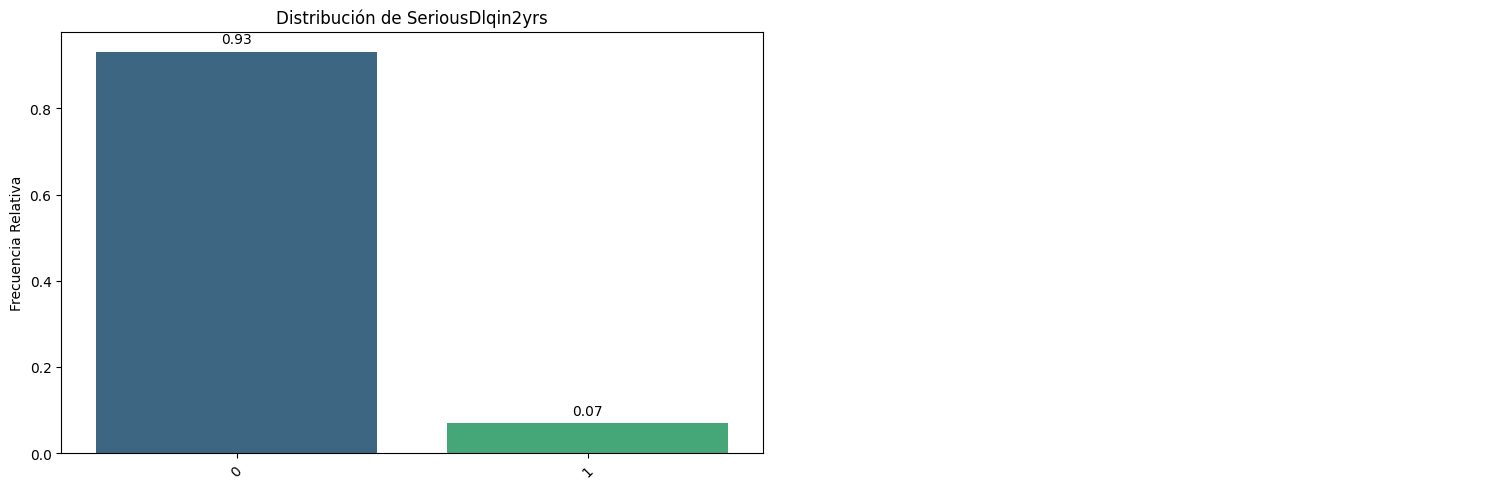

In [9]:
bt.pinta_distribucion_categoricas(df, [target], mostrar_valores=True, relativa=True)

El 7 % de los individuos tendrán problemas de liquidez financiera en 2 años. Claramente desequilibrado

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

In [10]:
features_num = ["RevolvingUtilizationOfUnsecuredLines", "DebtRatio", "MonthlyIncome"]
features_cat = ["age", "NumberOfOpenCreditLinesAndLoans","NumberOfTimes90DaysLate", "NumberRealEstateLoansOrLines", "NumberOfTime60-89DaysPastDueNotWorse", "NumberOfDependents"]


In [11]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

In [ ]:
moda_train = train_set[ndp].mode()

train

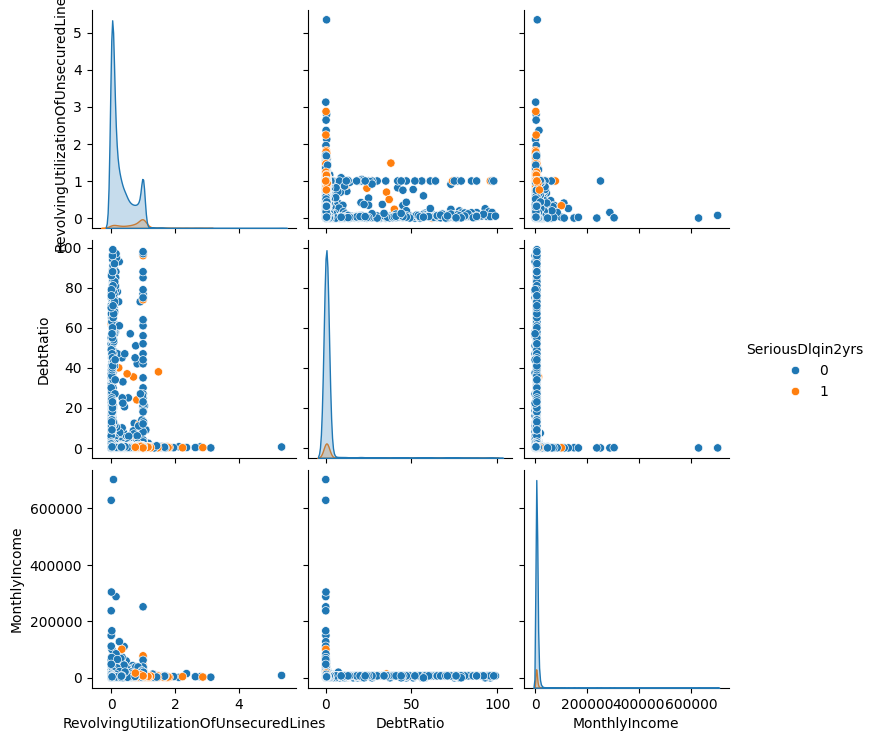

In [26]:
sns.pairplot(train_set[features_num + [target]], hue = target);

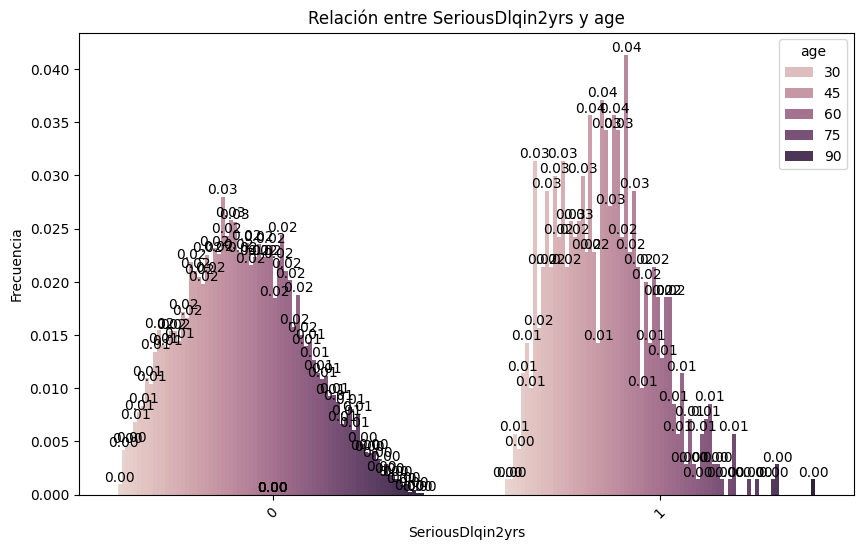

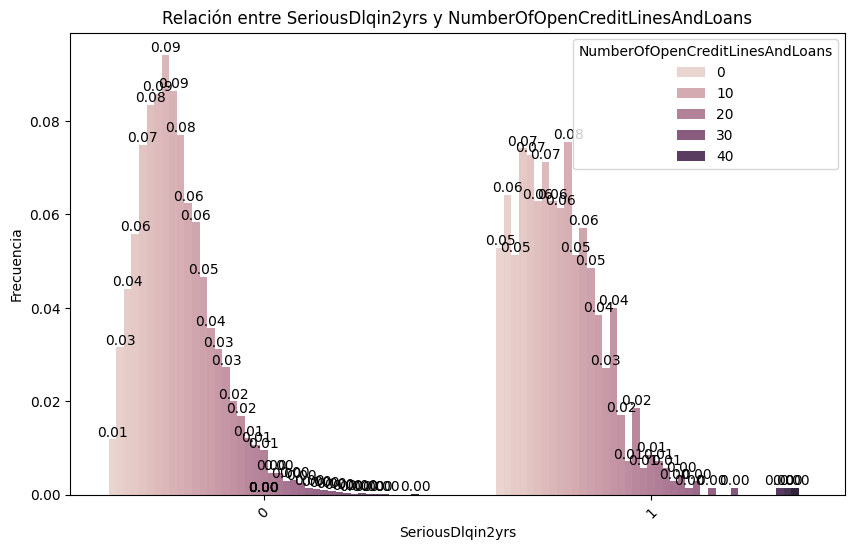

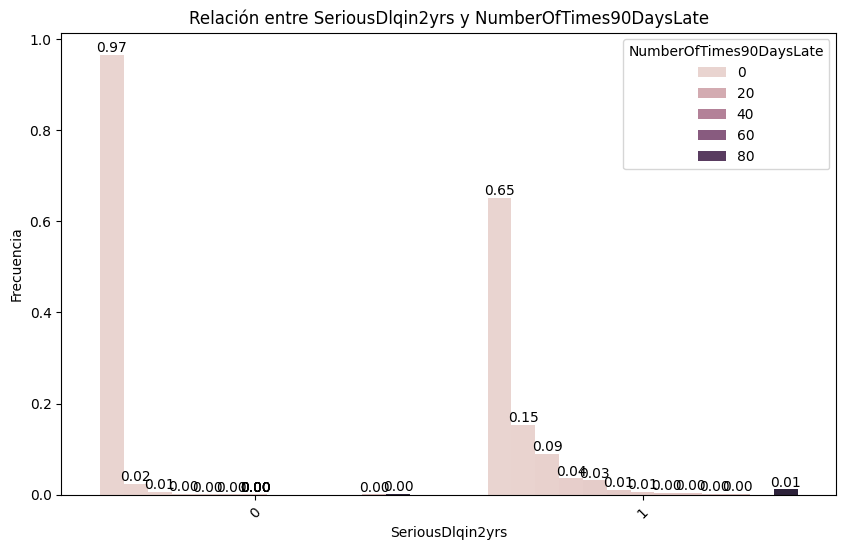

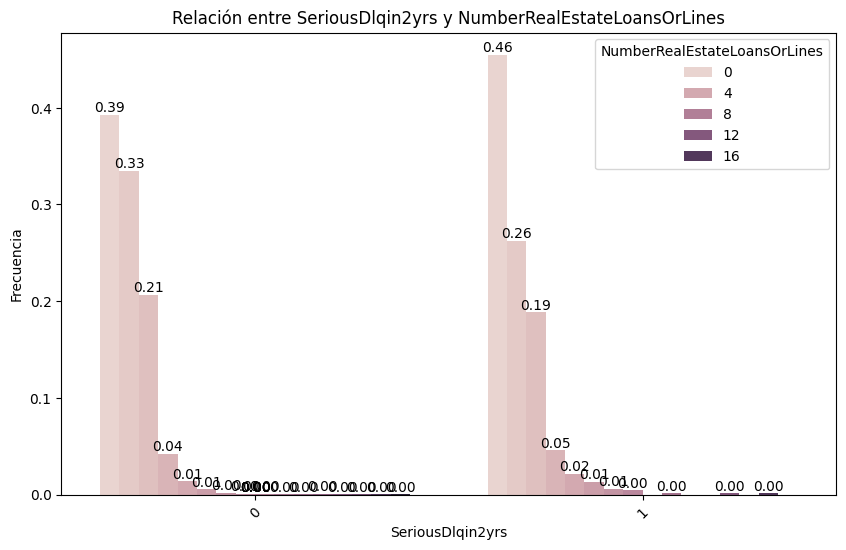

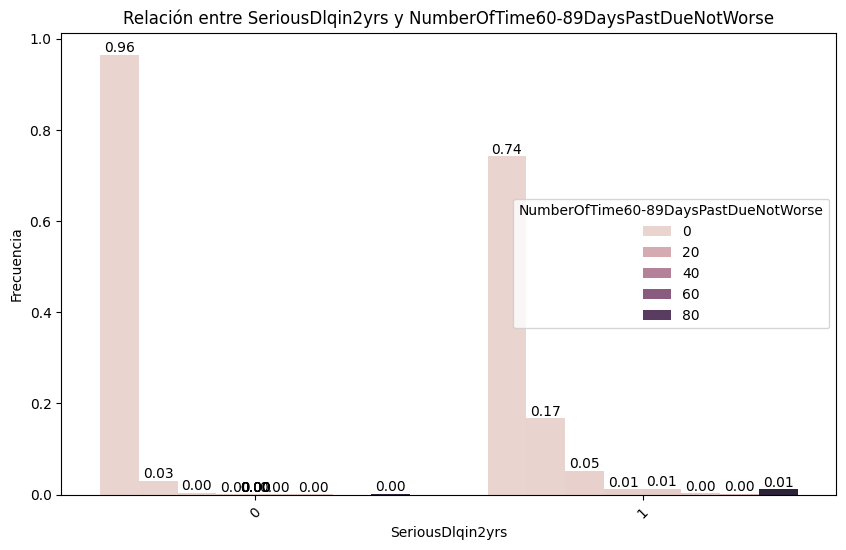

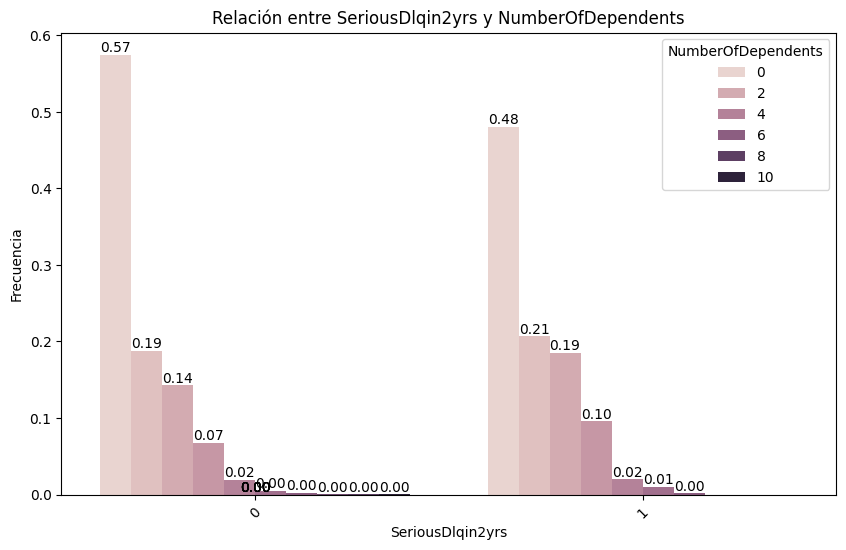

In [13]:
for feat in features_cat:
    bt.plot_categorical_relationship_fin(train_set, target, feat, show_values= True, relative_freq= True)

(3, 2)


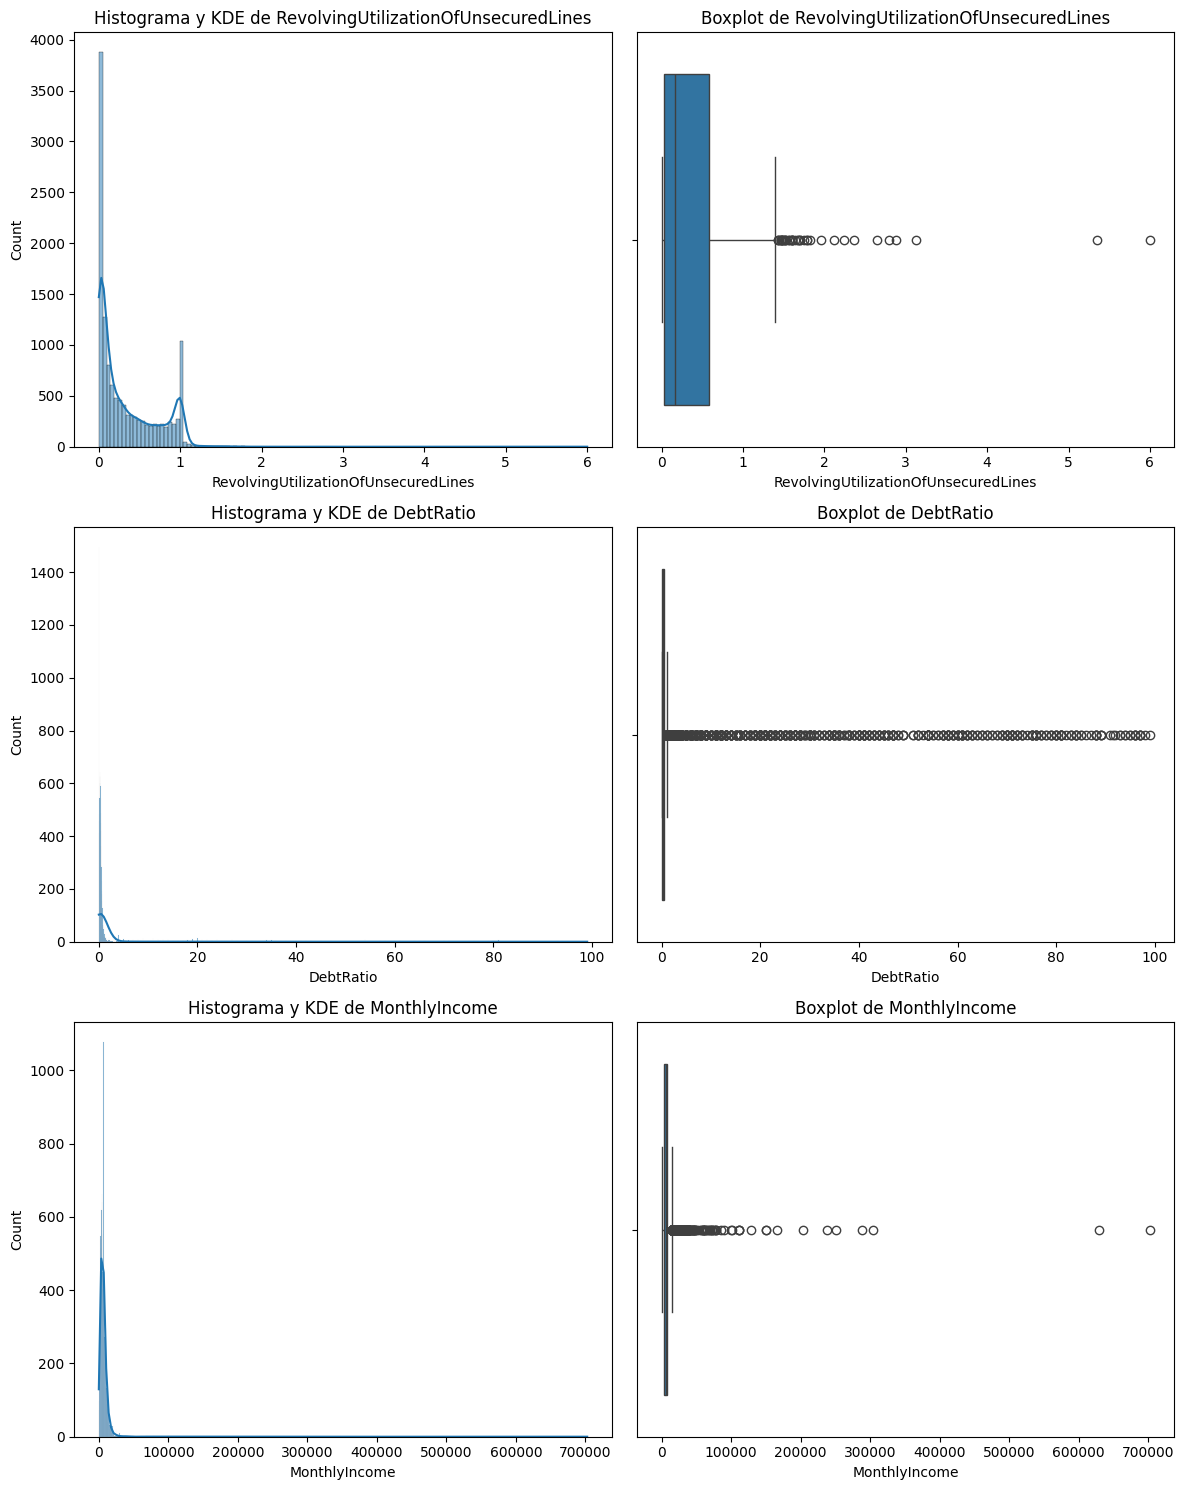

In [14]:
bt.plot_combined_graphs(df, features_num)

In [15]:
# Hay muchos outlanders en las variables numericas

In [16]:
# KNN:

knn = KNeighborsClassifier(n_neighbors=3)

X_train = train_set.drop(target, axis = 1)
y_train = train_set[target]
X_test = test_set.drop(target, axis = 1)
y_test = test_set[target]



In [17]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =  scaler.transform(X_test)

In [18]:

knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
# Realizar la validación cruzada y obtener las predicciones
y_pred_train = cross_val_predict(knn, X_train_scaled, y_train, cv=5)

# Generar el informe de clasificación
report = classification_report(y_train, y_pred_train)

print("Informe de clasificación:")
print(report)

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      9328
           1       0.42      0.15      0.23       701

    accuracy                           0.93     10029
   macro avg       0.68      0.57      0.59     10029
weighted avg       0.90      0.93      0.91     10029



In [20]:
# Necesitamos un recall media mayor de 0.57

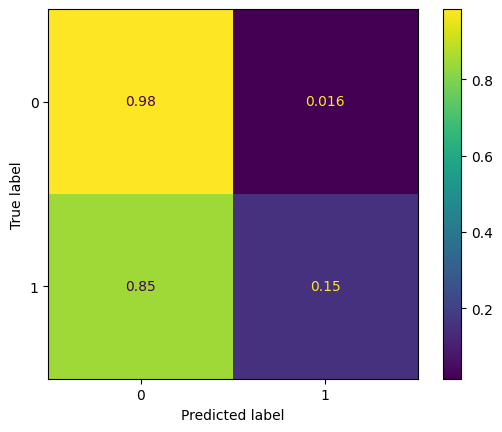

In [21]:
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train, normalize="true")

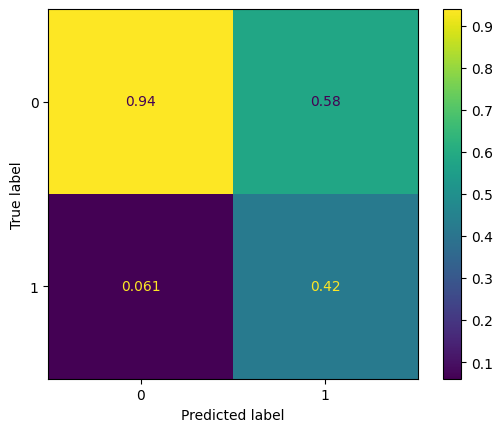

In [22]:
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train, normalize="pred")

In [23]:
# Buscamos el mejor k:


from sklearn.metrics import make_scorer, recall_score

# Definir el scorer personalizado para macro recall
recall_macro = make_scorer(recall_score, average='macro')

mejor_k = 1
mejor_metric = 0

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    # Validación cruzada para obtener el recall macro
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring=recall_macro)
    avg_score = scores.mean()
    print(f'k={k}, macro recall={avg_score}')
    if avg_score > mejor_metric:
        mejor_metric = avg_score
        mejor_k = k

print(f'Mejor k: {mejor_k}, con macro recall: {mejor_metric}')

# Entrenar el modelo con el mejor k
knn_mejor = KNeighborsClassifier(n_neighbors=mejor_k)
knn_mejor.fit(X_train_scaled, y_train)

# Evaluar contra el target
prediccion_test = knn_mejor.predict(X_test_scaled)
test_set["moroso"] = prediccion_test
prediccion_train = knn_mejor.predict(X_train_scaled)
train_set["moroso"] = prediccion_train

# Calcular y mostrar la métrica macro recall en el conjunto de prueba
macro_recall_test = recall_score(test_set["moroso"], prediccion_test, average='macro')
print(f'Macro recall en el conjunto de prueba: {macro_recall_test}')


k=1, macro recall=0.5943129681488777
k=2, macro recall=0.5358147301783875
k=3, macro recall=0.5690420449158458
k=4, macro recall=0.5359353917767613
k=5, macro recall=0.5516384641154645
k=6, macro recall=0.5307774763118178
k=7, macro recall=0.5420475431228804
k=8, macro recall=0.5232955249008732
k=9, macro recall=0.5312722476930667
k=10, macro recall=0.5197878473446529
k=11, macro recall=0.5266526199349506
k=12, macro recall=0.5179716856709529
k=13, macro recall=0.5226449327320178
k=14, macro recall=0.5164358469015942
k=15, macro recall=0.5211091801673263
k=16, macro recall=0.514894999745884
k=17, macro recall=0.521930675752621
k=18, macro recall=0.5156092854601697
k=19, macro recall=0.5184664283173126
k=20, macro recall=0.514292989758737
Mejor k: 1, con macro recall: 0.5943129681488777
Macro recall en el conjunto de prueba: 1.0


In [24]:
# usamos el mejor k = 1 y reajustamos equilibrio con Class Weight
# Entrenar el modelo con el mejor k y SMOTE porque Añade ejemplos sintéticos de la clase minoritaria (morosos) para balancear el dataset. 
# Ventajas: Ayuda al modelo a aprender mejor las características de la clase minoritaria y mejora la capacidad de detección.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Crear la pipeline con SMOTE y el modelo KNN
pipeline = Pipeline([
    ('smote', SMOTE()),
    ('knn', KNeighborsClassifier(n_neighbors=1))
])

# Entrenar el modelo
pipeline.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_test = pipeline.predict(X_test_scaled)

# Mostrar el informe de clasificación
print(classification_report(y_test, y_pred_test))



              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2345
           1       0.16      0.25      0.19       163

    accuracy                           0.86      2508
   macro avg       0.55      0.58      0.56      2508
weighted avg       0.89      0.86      0.88      2508

